# Notebook Structure

1. Import necessary dependencies
2. Define the Utility function to analyze text
3. Create the dataset
4. Execute the utility function and visualize the results
5. Visualize different measures


# 1. Import necessary dependencies

In [61]:
from collections import Counter
import re

# Definition of basic counting and frequencies measures for text data

* document_count: The total number of movie reviews in the dataset (e.g., 50 in the provided example).
* character_count: The number of characters in each individual movie review, including spaces and punctuation.
* word_count: The number of words in each individual movie review, typically separated by spaces or punctuation.
* total_words: The sum of all the words across all the movie reviews in the dataset.
* average_word_length: The mean number of characters per word, calculated by dividing the total number of characters by the total number of words.
* unique_word_count: The number of distinct words used across all the movie reviews, regardless of repetition.
* word_frequency: A count of how often each unique word appears in the entire collection of movie reviews.
* word_lengths: The number of characters in each word in the movie reviews.

# 2. Define the Utility function to analyze text

In [72]:
def analyze_text(text_data):
    """
    Performs univariate analysis on a list of text documents.

    Args:
        text_data (list): A list of strings, where each string is a document.

    Returns:
        dict: A dictionary containing the analysis results, including:
            - document_count: The total number of documents.
            - character_count: A list of character counts for each document.
            - word_count: A list of word counts for each document.
            - average_word_length: The average word length across all documents.
            - unique_word_count: The number of unique words across all documents.
            - word_frequency: A Counter object showing the frequency of each word.
            - word_lengths: A list of word lengths for each word in the corpus.
    """
    document_count = len(text_data)
    character_count = [len(doc) for doc in text_data]
    word_count = [len(re.findall(r'\b\w+\b', doc)) for doc in text_data]
    total_words = sum(word_count)
    average_word_length = total_words / sum(word_count) if total_words else 0
    words = [word.lower() for doc in text_data for word in re.findall(r'\b\w+\b', doc)]
    unique_word_count = len(set(words))
    word_frequency = Counter(words)
    word_lengths = [len(word) for word in words] # Calculate word lengths

    return {
        "document_count": document_count,
        "character_count": character_count,
        "word_count": word_count,
        "average_word_length": average_word_length,
        "unique_word_count": unique_word_count,
        "word_frequency": word_frequency,
        "word_lengths": word_lengths, # Include word lengths in the results
    }

# 3. Create the dataset

In [73]:
# Expanded text_data to 50 movie reviews
text_data = [
    "This is an excellent movie!  The acting was superb, and the plot was engaging.",
    "I found the movie to be quite boring. The plot was predictable.",
    "A fantastic film with great characters and amazing special effects.",
    "The movie was okay, but I expected more. The ending was weak.",
    "I highly recommend this movie!  A must-see film.",
    "The worst movie I have ever seen.  Complete waste of time.",
    "A good movie with a strong cast.  I enjoyed it.",
    "The movie was too long and slow.  I almost fell asleep.",
    "This is a must watch movie, I loved it.",
    "I hated this movie, it was the worst",
    "Another great movie! I loved the story.",
    "Not a fan. The acting was poor.",
    "Best movie ever! A masterpiece.",
    "It was alright, nothing special.",
    "I would watch it again. Good job!",
    "Terrible. Do not recommend.",
    "A decent movie. Worth watching once.",
    "The plot was confusing.",
    "I was on the edge of my seat!",
    "What a waste of money.",
    "Amazing.  Best ever.",
    "Boring.  Fell asleep.",
    "Could not finish it.",
    "Enjoyed it very much.",
    "Expected more.",
    "Fantastic.",
    "Great",
    "Hated it",
    "Interesting",
    "Just Okay",
    "Laughed a lot",
    "Mediocre",
    "Not bad",
    "Outstanding",
    "Predictable",
    "Quite good",
    "Recommended",
    "Slow",
    "Terrible",
    "Unbelievable",
    "Very good",
    "Waste of time",
    "Xcellent",
    "You will love it",
    "Zzzzz",
    "Action packed!",
    "Beautifully shot.",
    "Cinematic genius",
    "Disappointing",
    "Epic!"
]

# 4. Execute the utility function and visualize the results

In [74]:
# Perform the analysis
results = analyze_text(text_data)

In [76]:
# Print the results

print("Univariate Analysis of Movie Reviews:")
print(f"Total Number of Documents: {results['document_count']}")
print(f"Average Word Length: {results['average_word_length']:.2f}")
print(f"Number of Unique Words: {results['unique_word_count']}")

print("\nCharacter Counts:")
print(results['character_count'])

print("\nWord Counts:")
print(results['word_count'])

print("\nWord Frequency (Top 20):")
for word, count in results['word_frequency'].most_common(20):
    print(f"{word}: {count}")

Univariate Analysis of Movie Reviews:
Total Number of Documents: 50
Average Word Length: 1.00
Number of Unique Words: 111

Character Counts:
[78, 63, 67, 61, 48, 58, 47, 55, 39, 36, 39, 31, 31, 32, 33, 27, 36, 23, 29, 22, 20, 21, 20, 21, 14, 10, 5, 8, 11, 9, 13, 8, 7, 11, 11, 10, 11, 4, 8, 12, 9, 13, 8, 16, 5, 14, 17, 16, 13, 5]

Word Counts:
[14, 12, 10, 12, 9, 11, 10, 11, 9, 8, 7, 7, 5, 5, 7, 4, 6, 4, 8, 5, 3, 3, 4, 4, 2, 1, 1, 2, 1, 2, 3, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 3, 1, 4, 1, 2, 2, 2, 1, 1]

Word Frequency (Top 20):
the: 13
movie: 12
was: 11
i: 11
a: 10
it: 9
this: 4
of: 4
good: 4
not: 4
and: 3
plot: 3
great: 3
ever: 3
waste: 3
is: 2
acting: 2
quite: 2
boring: 2
predictable: 2


# 5. Visualize different measures

### A. Histogram to visualize word_length

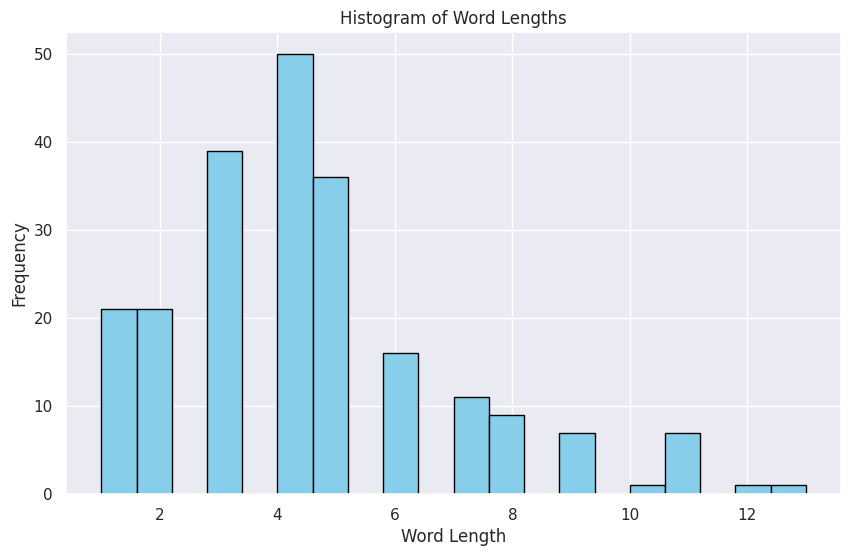

In [78]:
import matplotlib.pyplot as plt

# 1. Histogram of Word Lengths

plt.figure(figsize=(10, 6))
plt.hist(results['word_lengths'], bins=20, color='skyblue', edgecolor='black')  # More bins for better resolution
plt.title('Histogram of Word Lengths')
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### B. Bar plot to visualize the frequency of top 20 words

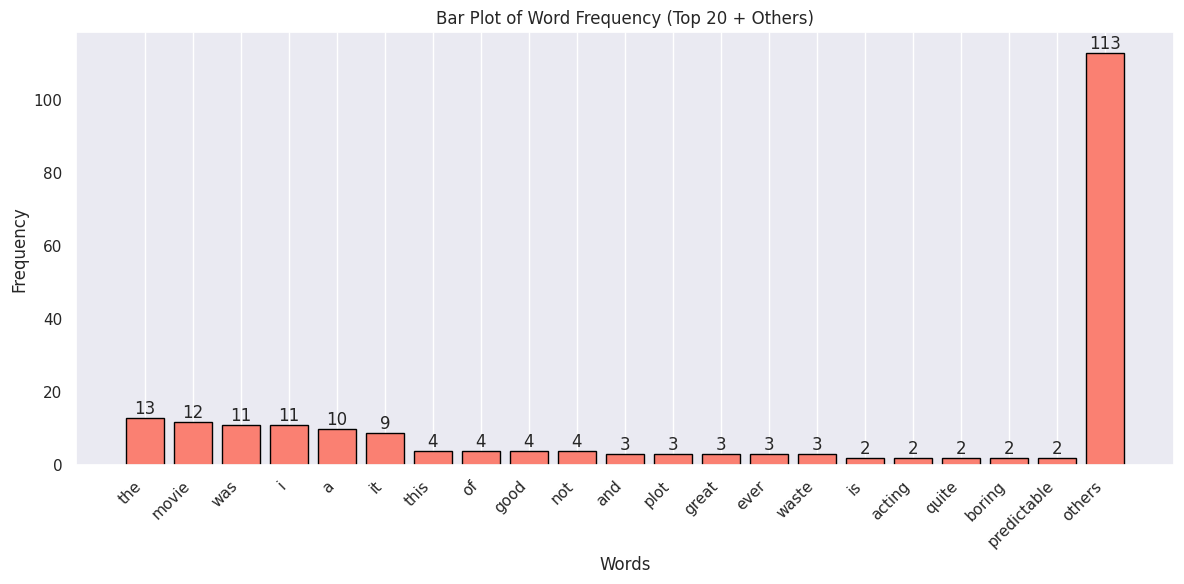

In [80]:
# 2. Bar Plot of Word Frequency (Top 20 + Others) with labels

top_20_words = results['word_frequency'].most_common(20)
other_words_count = sum(count for word, count in results['word_frequency'].items() if word not in [word for word, _ in top_20_words])

# Create data for the bar plot
words = [word for word, _ in top_20_words] + ['others']
counts = [count for _, count in top_20_words] + [other_words_count]

plt.figure(figsize=(12, 6))
bars = plt.bar(words, counts, color='salmon', edgecolor='black')
plt.title('Bar Plot of Word Frequency (Top 20 + Others)')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

# Add labels above the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')  # Use int(yval)

plt.tight_layout()
plt.show()

### C. Boxplot with jitters to visualize character count

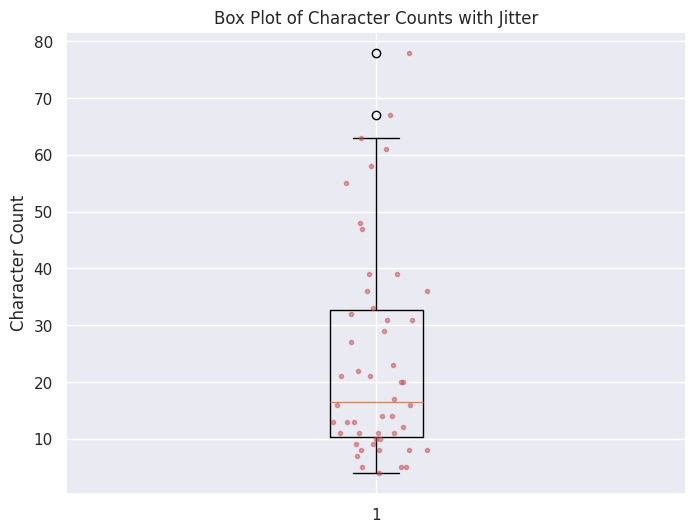

In [82]:
# 2. Character Count with Jitter
import numpy as np
plt.figure(figsize=(8, 6))
plt.boxplot(results['character_count'])
# Add jittered data points
y = results['character_count']
x = np.random.normal(1, 0.04, size=len(y))  # Adjust the spread (0.04) as needed
plt.plot(x, y, 'r.', alpha=0.5)  # 'r.' for red points, alpha for transparency
plt.title('Box Plot of Character Counts with Jitter')
plt.ylabel('Character Count')
plt.show()

### D. Boxplot with jitters to visualize word counts

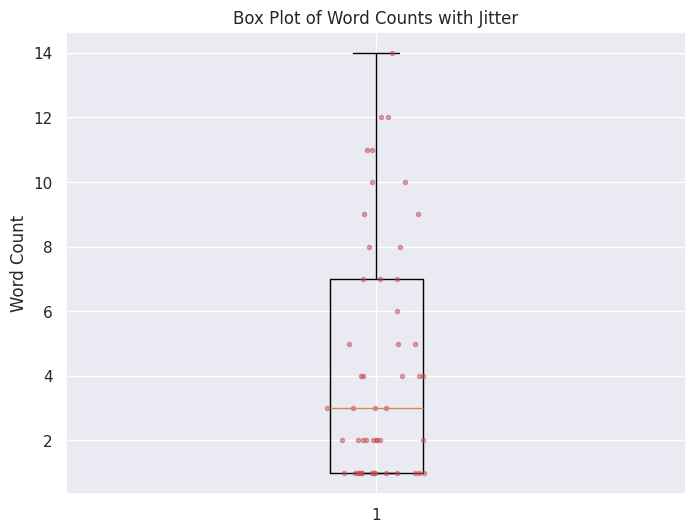

In [83]:
# 3. Word Count with Jitter

plt.figure(figsize=(8, 6))
plt.boxplot(results['word_count'])
# Add jittered data points
y = results['word_count']
x = np.random.normal(1, 0.04, size=len(y))
plt.plot(x, y, 'r.', alpha=0.5)
plt.title('Box Plot of Word Counts with Jitter')
plt.ylabel('Word Count')
plt.show()